In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../../")
from config.label_matchers import matchers

### Load the data:

In [2]:
lkml_civil_df = pd.read_csv("./lkml_civil.csv")
lkml_uncivil_df = pd.read_csv("./lkml_uncivil.csv")
gh_civil_df = pd.read_csv("./gh_civil.csv")
gh_uncivil_df = pd.read_csv("./gh_uncivil.csv")

In [3]:
print("Number of instances in the LKML civil dataset:", lkml_civil_df.shape[0])
print("Number of instances in the LKML uncivil dataset:", lkml_uncivil_df.shape[0])
print("Number of instances in the GitHub civil dataset:", gh_civil_df.shape[0])
print("Number of instances in the GitHub uncivil dataset:", gh_uncivil_df.shape[0])

Number of instances in the LKML civil dataset: 117
Number of instances in the LKML uncivil dataset: 276
Number of instances in the GitHub civil dataset: 350
Number of instances in the GitHub uncivil dataset: 803


*WARNING: Number of instances have important differences compared to [Ferreira et al., 2024].*

In [4]:
lkml_civil_df.sample(5)

,Unnamed: 0,thread_id,email_id,quotation,quotation_tbdf,email_final_code,author_name,author_email,author_role,is_first_author_thread,...,ratio_words_email_thread,ratio_words_email_comment,position_sentence_comment,position_sentence_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next,quotation_code
78,78,336834,337316,I still hope that I can get some feedback from...,hope_to_get_feedback,uncivil,Eugeniu Rosca,erosca@de.adit-jv.com,0,0,...,0.468085,0.916667,0.800000,0.826087,1,0.000000,0.000000,0.000000,0.0,civil
61,61,289026,291846,It would be good to get comments from people m...,hope_to_get_feedback,civil,Mike Kravetz,mike.kravetz@oracle.com,1,0,...,0.574468,1.000000,1.000000,0.145455,0,0.500000,0.500000,0.000000,0.0,civil
91,91,368515,368789,"I welcome this feature, been wanting it for so...",appreciation_excitement,civil,Stephane Eranian,eranian@google.com,0,0,...,0.722222,0.722222,0.083333,0.083333,1,0.000000,0.000000,0.000000,0.0,civil
0,0,152625,156871,"Not perfect, but a first solution.",humility,uncivil,Markus Heiser,markus.heiser@darmarit.de,0,0,...,0.103896,0.347826,0.666667,0.818182,0,0.500000,0.000000,0.000000,0.0,civil
99,99,391895,394633,I am happy to do any further debugging I can d...,appreciation_excitement,civil,Nishanth Aravamudan,naravamudan@digitalocean.com,0,0,...,0.403226,0.471698,1.000000,0.058824,0,0.045977,0.954023,0.011494,0.0,civil


In [5]:
lkml_uncivil_df.sample(5)

,Unnamed: 0,thread_id,email_id,quotation,quotation_tbdf,email_final_code,author_name,author_email,author_role,is_first_author_thread,...,ratio_words_email_thread,ratio_words_email_comment,position_sentence_comment,position_sentence_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next,quotation_code
32,32,173287,173288,You can't do it this simply as it will cause d...,name_calling,uncivil,Jonathan Cameron,jic23@kernel.org,1,0,...,0.714286,0.714286,0.500000,0.500000,1,0.000000,0.000000,0.0,0.0,uncivil
117,117,258997,260189,Can you fix it correctly by replacing the 'swi...,mocking,uncivil,Daniel Lezcano,daniel.lezcano@linaro.org,1,0,...,0.696970,1.000000,1.000000,1.000000,0,0.500000,0.250000,0.0,0.0,uncivil
137,137,289431,292003,Where did this come from? XFS doesn't use the ...,bitter_frustration,uncivil,Dave Chinner,david@fromorbit.com,0,0,...,0.383562,1.000000,0.200000,0.714286,0,1.000000,0.000000,1.0,0.0,uncivil
246,246,476403,478120,The kernel is not the place to try and abstrac...,vulgarity,uncivil,Peter Zijlstra,peterz@infradead.org,1,0,...,1.000000,1.000000,0.875000,0.928571,0,1.000000,0.000000,0.0,0.0,uncivil
181,181,391895,397297,Unless you have solid suggestions on how to de...,threat,uncivil,Peter Zijlstra,peterz@infradead.org,1,0,...,0.322581,0.377358,0.545455,0.191176,0,0.068966,0.931034,0.0,0.0,uncivil


In [6]:
gh_civil_df.sample(5)

,Unnamed: 0,issue_id,comment_id,quotation,quotation_tbdf,quotation_code,issue_final_code,author_name,is_first_author_thread,nr_characters,ratio_words_email_thread,ratio_words_email_comment,position_sentence_comment,position_sentence_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
247,247,3808,60899671,I will be highly appreciated any useful advice.,humility,civil,civil,NaN,0,47,0.084906,0.310345,1.000000,0.325301,0,0.000000,0.998672,1.000000,0.001328
167,167,27445,372105535,I'm not the guy who can actually judge what yo...,humility,civil,uncivil,Marius Räsener,0,64,0.365854,0.365854,0.666667,0.666667,0,0.592593,0.406285,0.407407,0.572391
264,264,47841,384634459,"Make up your mind, updater…",friendly_joke,civil,civil,Nathan,0,27,0.240000,0.240000,0.750000,0.750000,0,0.060606,0.939394,0.944444,0.005051
308,308,6948,385313083,I would like to see [reading metadata in separ...,expectation,civil,civil,NaN,0,56,0.210526,1.000000,1.000000,0.283333,0,0.047297,0.952703,0.959459,0.047297
4,4,10260,108364977,"I don't know anything about gclient or gyp, an...",humility,civil,civil,NaN,0,191,0.826923,0.000000,0.392857,0.672131,0,0.150253,0.849184,0.849747,0.129994


In [7]:
gh_uncivil_df.sample(5)

,Unnamed: 0,issue_id,comment_id,quotation,quotation_tbdf,quotation_code,issue_final_code,author_name,is_first_author_thread,nr_characters,ratio_words_email_thread,ratio_words_email_comment,position_sentence_comment,position_sentence_thread,is_last_comment,time_start_to_email,time_email_to_end,time_previous_to_email,time_email_to_next
511,511,35,631046549,"How can you seriously accuse others of like, t...",name_calling,uncivil,uncivil,NaN,0,221,0.564103,0.564103,0.555556,0.839623,0,0.000000,0.000000,0.000000,0.000000
516,516,35,631050062,I don't know how you can question the seriousn...,name_calling,uncivil,uncivil,Mirko Brombin,0,176,0.410256,1.000000,0.272727,0.915094,0,0.000000,0.000000,0.000000,0.000000
210,210,19602,435049950,"thanks a lot for your enthusiasm, but I am the...",name_calling,uncivil,uncivil,Juan Linietsky,0,94,0.323529,0.323529,0.142857,0.020408,0,0.545817,0.450199,0.454183,0.549801
177,177,1639,417479261,If you're looking for rancorous sniping and ha...,name_calling,uncivil,uncivil,Daniel Stockman,0,89,0.279412,1.000000,1.000000,0.275000,0,0.000000,1.000000,2.000000,1.000000
332,332,2529,619631237,It's because of people like you that real devi...,mocking,uncivil,uncivil,NaN,0,110,0.523810,0.709677,0.800000,0.108108,0,0.000000,0.000000,0.000000,0.000000


In [8]:
lkml_civil_df.rename(columns={"email_id": "id", "quotation": "text", "quotation_code": "label"}, inplace=True)
lkml_uncivil_df.rename(columns={"email_id": "id", "quotation": "text", "quotation_code": "label"}, inplace=True)
gh_civil_df.rename(columns={"comment_id": "id", "quotation": "text", "quotation_code": "label"}, inplace=True)
gh_uncivil_df.rename(columns={"comment_id": "id", "quotation": "text", "quotation_code": "label"}, inplace=True)

In [9]:
matcher = {v: k for (k, v) in matchers["incivility"].items()}
lkml_civil_df["label"] = lkml_civil_df["label"].replace(matcher).astype(int)
lkml_uncivil_df["label"] = lkml_uncivil_df["label"].replace(matcher).astype(int)
gh_civil_df["label"] = gh_civil_df["label"].replace(matcher).astype(int)
gh_uncivil_df["label"] = gh_uncivil_df["label"].replace(matcher).astype(int)

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_28560\592263613.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lkml_civil_df["label"] = lkml_civil_df["label"].replace(matcher).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_28560\592263613.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lkml_uncivil_df["label"] = lkml_uncivil_df["label"].replace(matcher).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_28560\592263613.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and wil

### Clean the data:

In [10]:
print("Number of missing texts in the LKML civil dataset:", lkml_civil_df["text"].isnull().sum())
print("Number of missing texts in the LKML uncivil dataset:", lkml_uncivil_df["text"].isnull().sum())
print("Number of missing texts in the GitHub civil dataset:", gh_civil_df["text"].isnull().sum())
print("Number of missing texts in the GitHub uncivil dataset:", gh_uncivil_df["text"].isnull().sum())

Number of missing texts in the LKML civil dataset: 0
Number of missing texts in the LKML uncivil dataset: 0
Number of missing texts in the GitHub civil dataset: 0
Number of missing texts in the GitHub uncivil dataset: 0


In [11]:
print("Number of missing labels in the LKML civil dataset:", lkml_civil_df["label"].isnull().sum())
print("Number of missing labels in the LKML uncivil dataset:", lkml_uncivil_df["label"].isnull().sum())
print("Number of missing labels in the GitHub civil dataset:", gh_civil_df["label"].isnull().sum())
print("Number of missing labels in the GitHub uncivil dataset:", gh_uncivil_df["label"].isnull().sum())

Number of missing labels in the LKML civil dataset: 0
Number of missing labels in the LKML uncivil dataset: 0
Number of missing labels in the GitHub civil dataset: 0
Number of missing labels in the GitHub uncivil dataset: 0


In [12]:
print(f"Number of duplicated texts in the LKML civil dataset: {lkml_civil_df["text"].duplicated().sum()} ({lkml_civil_df["text"].duplicated().sum()/lkml_civil_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the LKML uncivil dataset: {lkml_uncivil_df["text"].duplicated().sum()} ({lkml_uncivil_df["text"].duplicated().sum()/lkml_uncivil_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the GitHub civil dataset: {gh_civil_df["text"].duplicated().sum()} ({gh_civil_df["text"].duplicated().sum()/gh_civil_df.shape[0]:.2%})")
print(f"Number of duplicated texts in the GitHub uncivil dataset: {gh_uncivil_df["text"].duplicated().sum()} ({gh_uncivil_df["text"].duplicated().sum()/gh_uncivil_df.shape[0]:.2%})")

Number of duplicated texts in the LKML civil dataset: 3 (2.56%)
Number of duplicated texts in the LKML uncivil dataset: 52 (18.84%)
Number of duplicated texts in the GitHub civil dataset: 5 (1.43%)
Number of duplicated texts in the GitHub uncivil dataset: 13 (1.62%)


*WARNING: Duplicated texts for the LKML uncivil dataset is particularly high.*

### Analyze distributions:

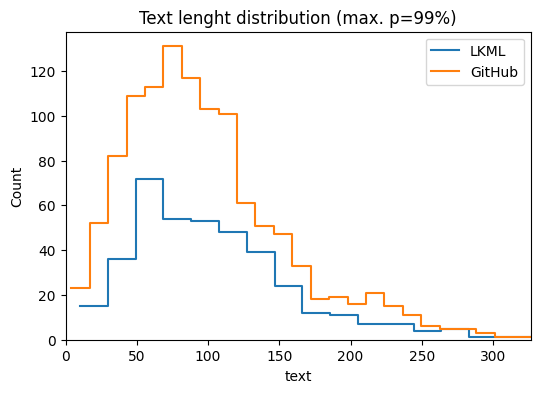

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(pd.concat([lkml_civil_df, lkml_uncivil_df])["text"].str.len(), element="step", fill=False)
sns.histplot(pd.concat([gh_civil_df, gh_uncivil_df])["text"].str.len(), element="step", fill=False)
plt.xlim([
    0,
    pd.concat([
        lkml_civil_df["text"].str.len(),
        lkml_uncivil_df["text"].str.len(),
        gh_civil_df["text"].str.len(),
        gh_uncivil_df["text"].str.len(),
    ], axis=1, ignore_index=True).quantile(.99).max()
])
plt.legend(labels=["LKML", "GitHub"])
plt.title("Text lenght distribution (max. p=99%)")
plt.show()

In [14]:
label_stats = pd.concat([
    pd.concat([lkml_civil_df, lkml_uncivil_df])["label"].value_counts(dropna=False, normalize=True),
    pd.concat([gh_civil_df, gh_uncivil_df])["label"].value_counts(dropna=False, normalize=True),
    pd.concat([lkml_civil_df, lkml_uncivil_df, gh_civil_df, gh_uncivil_df])["label"].value_counts(dropna=False, normalize=True)
], axis=1)
label_stats.columns = ["LKML", "GitHub", "all"]
label_stats.round(2)

,LKML,GitHub,all
label,,,
0,0.7,0.7,0.7
1,0.3,0.3,0.3


### Persist datasets:

In [15]:
df = pd.concat([lkml_civil_df, lkml_uncivil_df, gh_civil_df, gh_uncivil_df], ignore_index=True)

In [16]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 74 (4.79%)


In [17]:
df[["id", "text", "label"]].to_parquet("./incivility.parquet", index=False)

In [18]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 1546
